In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as la
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

### Problem 2

In [2]:
with open('data\wine.data') as f:
     read_data = f.read()
read_data = read_data.split('\n')

count = 0
l = len(read_data)
data = []
for str in read_data:
    for temp in str.split(','):
        if temp.endswith(','):
            temp = temp[:-2]
        try:
            data.append(float(temp))
        except:
            print(temp)
data = np.array(data).reshape((-1,14))

In [3]:
X = StandardScaler().fit_transform(data[:,1:])
cov_mat = np.cov(X.T)

w,v = la.eig(cov_mat)
arg = np.flip(np.argsort(w))
w = w[arg]
v = v[arg]

(array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
        0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
        0.22706428, 0.16972374, 0.10396199]),
 array([ 0,  1,  2,  3,  4,  5,  6,  8, 10, 12, 11,  9,  7], dtype=int64))

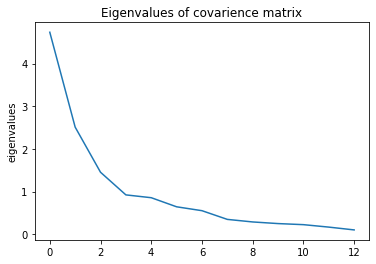

In [4]:
plt.plot(w)
plt.title("Eigenvalues of covarience matrix")
plt.ylabel("eigenvalues")
w,arg

In [5]:
pca = PCA(n_components = 2)
pc = pca.fit_transform(X)
df_pc = pd.DataFrame(data = pc, columns = ["Malic acid","Ash"])
df_pc

,Malic acid,Ash
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


<AxesSubplot:title={'center':'Scatter plot over two principal components'}, xlabel='Malic acid', ylabel='Ash'>

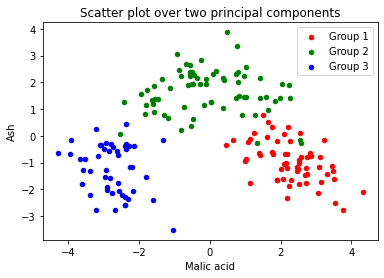

In [6]:
ax = df_pc[data[:,0] == 1].plot.scatter(x='Malic acid', y='Ash', color='Red', label='Group 1')
plt.title("Scatter plot over two principal components")
df_pc[data[:,0] == 2].plot.scatter(x='Malic acid', y='Ash', color='Green', label='Group 2', ax=ax)
df_pc[data[:,0] == 3].plot.scatter(x='Malic acid', y='Ash', color='Blue', label='Group 3', ax=ax)

### Problem 3

In [7]:
data = np.loadtxt('data\seeds_dataset.txt')

X = StandardScaler().fit_transform(data[:,:-1])
cov_mat = np.cov(X.T)

w,v = la.eig(cov_mat)
arg = np.flip(np.argsort(w))
w = w[arg]
v = v[arg]

In [8]:
df_data = pd.DataFrame(data, columns = ["area","perimeter","compactness","length of kernel", 
                                        "width of kernel", "asymmetry", "kernel groove", "species"])
df_data.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry,kernel groove,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


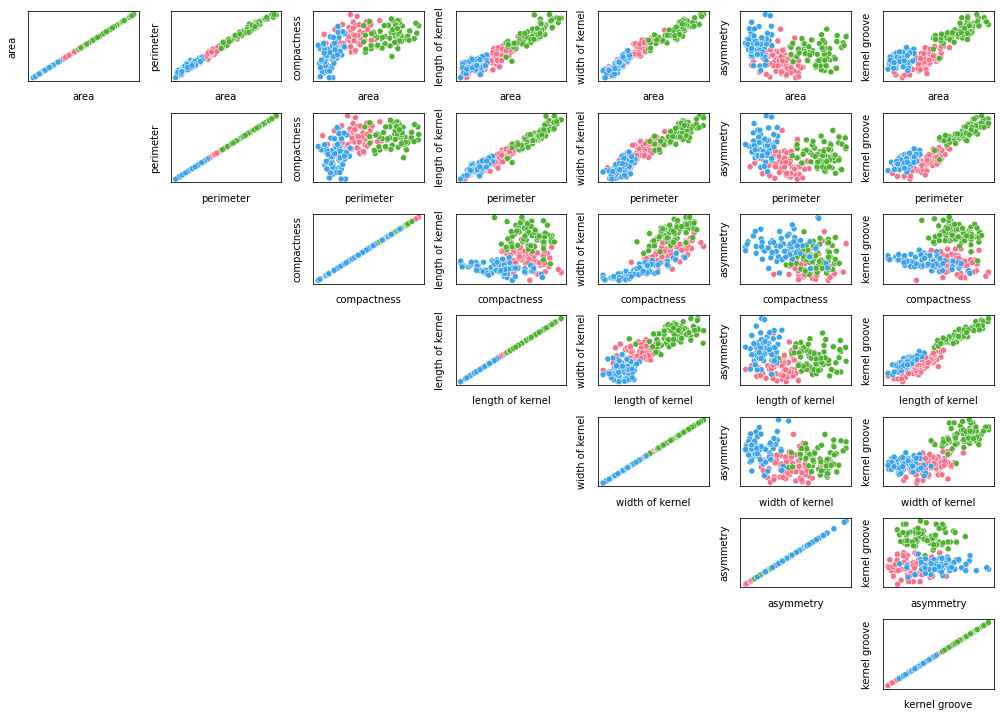

In [9]:
# I misread the problem,this code generates scatter plot among all components. But I will keep the code here anyway
colors = sns.color_palette('husl', n_colors=3) 
cmap = dict(zip({1,2,3}, colors)) 

plt.figure(figsize=(14, 10))
for i in range(7):
    for j in range(i,7):
        plt.subplot(7, 7, i*7+j+1)
        p = sns.scatterplot(data=df_data, x=df_data.columns[i], y=df_data.columns[j], hue='species', palette=cmap)
        p.legend_.remove()
        p.set(xticklabels=[],yticklabels=[]) 
        p.tick_params(bottom=False, left=False) 
plt.tight_layout()
plt.show()

(array([5.05527392e+00, 1.20330286e+00, 6.81247474e-01, 6.86915798e-02,
        1.88031478e-02, 5.35755786e-03, 8.16283865e-04]),
 array([0, 1, 2, 3, 4, 6, 5], dtype=int64))

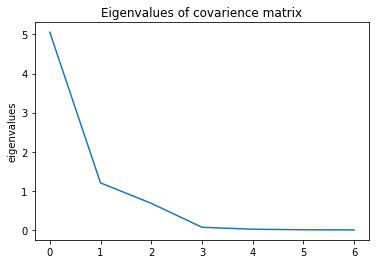

In [10]:
plt.plot(w)
plt.title("Eigenvalues of covarience matrix")
plt.ylabel("eigenvalues")
w, arg

<AxesSubplot:title={'center':'Scatter plot over two principal components'}, xlabel='area', ylabel='perimeter'>

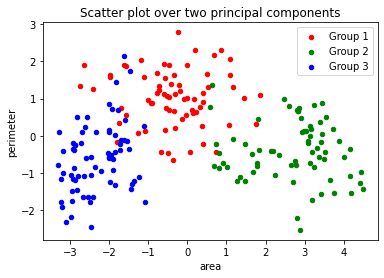

In [11]:
pca = PCA(n_components = 2)
pc = pca.fit_transform(X)
df_pc = pd.DataFrame(data = pc, columns = ["area","perimeter"])
ax = df_pc[data[:,-1] == 1].plot.scatter(x="area", y="perimeter", color='Red', label='Group 1')
plt.title("Scatter plot over two principal components")
df_pc[data[:,-1] == 2].plot.scatter(x="area", y="perimeter", color='Green', label='Group 2', ax=ax)
df_pc[data[:,-1] == 3].plot.scatter(x="area", y="perimeter", color='Blue', label='Group 3', ax=ax)